#                                          Iris Species Classification 

## 1. Import  Libraries

In [1]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


In [2]:
# Data file path
FILE_PATH = 'IRIS.csv'

# Dataframe from csv file
iris_data = pd.read_csv(FILE_PATH, header=0)

In [3]:
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## 2. Data Preprocessing

In [4]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [5]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [6]:
y_enc = LabelEncoder().fit_transform(y.values.ravel())
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

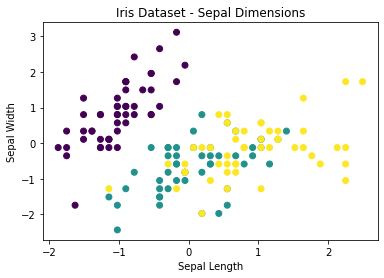

In [7]:
# Scatter plot visualization
plt.scatter(X['sepal_length'], X['sepal_width'], c=y_enc)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Sepal Dimensions')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [9]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)
(4,)


## 3. Sequential API Model Development

In [10]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

## 4. Model Training and Validation 

In [14]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2869 - val_accuracy: 0.9556
Epoch 2/50
4/4 [==============================] - 0s 26ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1991 - val_accuracy: 0.9778
Epoch 3/50
4/4 [==============================] - 0s 26ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9778
Epoch 4/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2181 - val_accuracy: 0.9556
Epoch 5/50
4/4 [==============================] - 0s 27ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.2178 - val_accuracy: 0.9778
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0106 - accuracy: 0.9905 - val_loss: 0.5797 - val_accuracy: 0.8889
Epoch 7/50
4/4 [==============================] - 0s 24ms/step - loss: 0.3138 - accuracy: 0.9429 - val_loss: 0.6744 - val_accuracy: 0.9111
Epoch 8/50
4/4 [===========

## 5. Model Evaluation and Performance Reporting

In [18]:
prediction = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(prediction, axis=1)

print("\n** Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))
print("\n** Result Report:\n", classification_report(y_test_class, y_pred_class))

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("\n** Test loss:\n", test_scores[0])
print("\n** Test accuracy:\n", test_scores[1])

2/2 [==============================] - 0s 5ms/step

** Confusion Matrix:
 [[15  1  0]
 [ 0 14  0]
 [ 0  0 15]]

** Result Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

2/2 - 0s - loss: 0.0262 - accuracy: 0.9778 - 46ms/epoch - 23ms/step

** Test loss:
 0.02619853988289833

** Test accuracy:
 0.9777777791023254


## 6. Performance Monitor

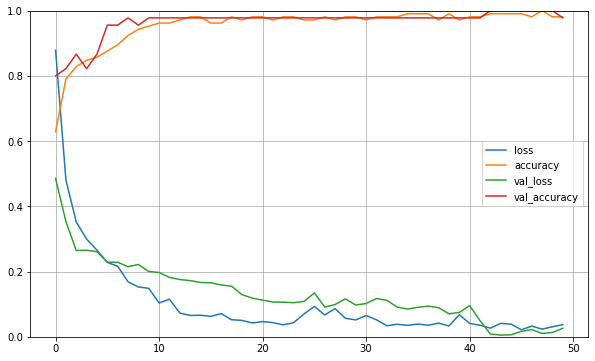

In [16]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 7. Prediction and Comparison of Model Output with Actual Labels

In [17]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 91ms/step
Actual data : [[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
2
2
1


# Reflection

#### I found the development of a classification model using the well-known iris species dataset to be truly captivating. The whole process immersed me in a sense of excitement as I explored and experimented with different layers to enhance the performance of my model. It was satisfying to monitor the training progress and witness the gradual increase in accuracy with each epoch, while also observing the decline in error rate.


#### In conclusion, I cherished the opportunity to apply my knowledge and skills to the iris species dataset. 

###### Done by Azzah 